# Importing and Tidying the Data

In [1]:
# import stuff
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
from scipy import stats

In [4]:
#import the data from csv file with a series of NAN values 
df3 = pd.read_csv('./../data/highered_00004.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )

In [5]:
#'REFID' contains two data types and is repeated info from 'PERSONID'. Column dropped. 
df = df3.drop(['REFID'], axis=1)

In [6]:
# explanation of the survey https://highered.ipums.org/highered/survey_designs.shtml

# Respondents from each of these three surveys with science or engineering degrees                               ##
# or occupations are compiled into one dataset: the SESTAT (the Scientists and Engineers Statistical Data System)##

df.info(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478747 entries, 0 to 478746
Data columns (total 33 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
GENDER      478747 non-null int64
MINRTY      478747 non-null int64
RACETH      478747 non-null int64
BTHUS       478747 non-null int64
CTZUSIN     478747 non-null int64
CTZUS       438777 non-null float64
FNVS        20573 non-null float64
CHTOT       219740 non-null float64
BA03Y5      465491 non-null float64
NBAMED      463945 non-null float64
NBAMEMG     465494 non-null float64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-n

**Use string catagorical data to replace numerical data for easy understanding**

In [7]:
#change the minority column to string containing the actual value
min_map = {0: 'Not minority', 1: 'Minority'}
df['MNTRS'] = df['MINRTY'].map(min_map)

In [8]:
#change the gender column to string containing the actual 'female' or 'male' value
gen_map = {1: 'Female', 2: 'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

In [9]:
major_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['MajorS'] = df['NDGMEMG'].map(major_map)

In [10]:
job_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['JobS'] = df['NOCPRMG'].map(job_map)

In [11]:
#change the race column to string containing the actual value
race_map = {1: 'Asian', 2: 'White', 3: 'Other Minorities', 4: 'Other'}
df['RACES'] = df['RACETH'].map(race_map)

In [12]:
#how many people are employed for each gender?
LF_map = {1: 'Employed', 2: 'Unemployed', 3: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)

In [13]:
#change the birth in US column to string containing the actual value
birth_map = {0: 'Not in the US', 1: 'Born in the US'}
df['BUSS'] = df['BTHUS'].map(birth_map)

In [14]:
#how many people are satisfied with their jobs
JS_map = {1: 'Satisfied', 2: 'Satisfied', 3: 'Dissatisfied', 4: 'Dissatisfied'}
df['JobSatis'] = df['JOBSATIS'].map(JS_map)
df_gender_satisfy = df.groupby('GENDERS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()

In [15]:
#how many people are satisfied with their jobs
JR_map = {1: 'Related', 2: 'Related', 3: 'Not Related'}
df['JobR'] = df['OCEDRLP'].map(JR_map)

**Drop unusable columns**

In [16]:
df = df.drop(['MINRTY','GENDER','RACETH','BTHUS','FNVS', 'CHTOT', 'CTZUS','NBAMEMG','NBAMED', 'BA03Y5'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478747 entries, 0 to 478746
Data columns (total 32 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
CTZUSIN     478747 non-null int64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-null float64
LOOKWK      71269 non-null float64
OCEDRLP     407478 non-null float64
NOCPR       407478 non-null float64
NOCPRMG     407478 non-null float64
SALARY      407478 non-null float64
CPI2009C    478747 non-null float64
JOBSATIS    407478 non-null float64
MNTRS       478747 non-null object
GENDERS     478747 non-null object
MajorS      478747

** Make some branch data frames for easy manipulation **

In [18]:
#a data frame for graduates only 
df_SDR = df[(df['SAMPLE']==602) |(df['SAMPLE']==602) | (df['SAMPLE']==1002)]
df_graduate = df[(df['DGRDG'] == 2) | (df['DGRDG'] == 3) | (df['DGRDG'] == 4)]
df_dr = df[(df['DGRDG'] == 3) ]
df_prof = df[(df['DGRDG'] == 4) ]

In [19]:
#a data frame for undergraduates only 
df_CR = df[(df['SAMPLE']==601) | (df['SAMPLE']==603) | (df['SAMPLE']==1001)]
df_undergraduate = df[(df['DGRDG'] == 1)]

In [20]:
df_2003 = df[df['YEAR']==2003]

In [21]:
df_2013 = df[df['YEAR']==2013]

## What is the employment rate for each gender from the STEM community?##
The bar plot below shows the employment rate in the STEM community for the female and male groups. It indicates the employment rate for all is between 80%-90% with around 3% higher rate for men than women. 

In [22]:
df_gender_employ = df.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

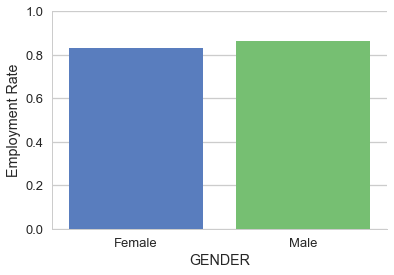

In [23]:
#count plot of employed and unemployed entries for genders.
sns.barplot(x='GENDERS', y='Employed', data = df_gender_employ, palette="muted")
plt.xlabel('GENDER')
plt.ylim([0,1])
plt.ylabel('Employment Rate')
sns.despine()

## Is this result statistically significant? ##

<p>This is a problem with two categorical columns. It would involve a $\chi ^2$ test to find whether the result is statistically significant.</p>

First we define the null hypothesis: 
$$H_0: p_m = p_f$$ 
And the alternative hypothesis:
$$H_0: p_m \neq p_f$$

Use the chi2 modual from the scipi package, the p-value is ealiy found. 


In [24]:
cont_table = pd.crosstab(index=df.GENDERS, columns=df.LFSTATS)
chi2, pval, _, _ = stats.chi2_contingency(cont_table)
print("Chi-squared test statistic: {}".format(chi2))
print("p-value: {}".format(pval))

Chi-squared test statistic: 768.2903180174724
p-value: 4.2314686514568015e-169


The above results shows the p-value is practically zero. 
$$p < \alpha $$ 
The null hypothesis is rejected in this case. 
#### There is a statistical significance in the difference of employment rate for men and women. 

### A closer look at the employment rate ###

We have already known that the female employment is lower than that of male. Now we take a closer look into the data, in specific, the undergraduate and graduate group data.

The below dot plot shows the employment rate for both female and male in the undergraduate and graduate groups. It is clear that the undergraduate group has a 7% employment rate difference in men and women. And the disparity diminishes for the  graduate group. In fact, female employment rate goes almost the same as males in graduate level groups! 

The last dot plot shows the employment rate for the doctorate group. In this case, the employment rate for women rose higher than the men! Can we consider this to be an effective career advice for female students? 

In [25]:
employ_ug = df_undergraduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_ug_melt = pd.melt(employ_ug.reset_index(), id_vars ='GENDERS')
employed_ug_melt_e = employ_ug_melt[employ_ug_melt['LFSTATS']=='Employed']
employed_ug_melt_e['Degree'] = 'Undergraduate'
employ_gr = df_graduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_gr_melt = pd.melt(employ_gr.reset_index(), id_vars ='GENDERS')
employed_gr_melt_e = employ_gr_melt[employ_gr_melt['LFSTATS']=='Employed']
employed_gr_melt_e['Degree'] = 'Graduate'
employ_dr = df_dr.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_dr_melt = pd.melt(employ_dr.reset_index(), id_vars ='GENDERS')
employed_dr_melt_e = employ_dr_melt[employ_dr_melt['LFSTATS']=='Employed']
employed_dr_melt_e['Degree'] = 'Doctorate'
employed_new = pd.concat([employed_ug_melt_e,employed_gr_melt_e,employed_dr_melt_e])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

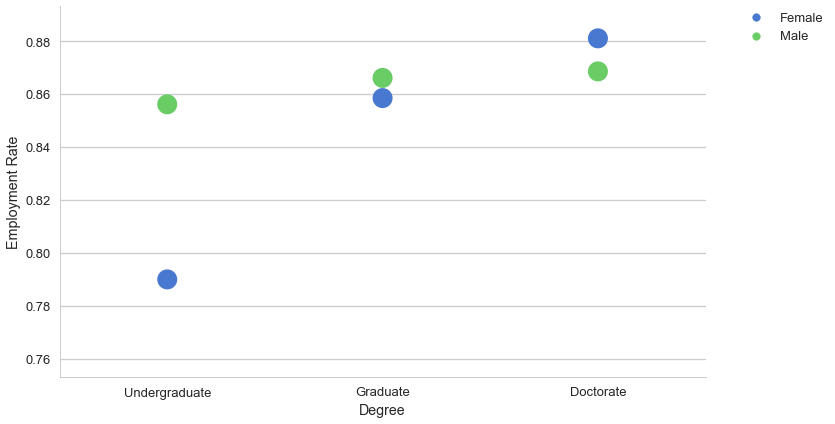

In [26]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Degree', y='value', data=employed_new, hue='GENDERS', size =20, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.ylabel('Employment Rate')

In [27]:
cont_table = pd.crosstab(index=df_graduate.GENDERS, columns=df_graduate.LFSTATS)
chi2, pval, _, _ = stats.chi2_contingency(cont_table)
print("Chi-squared test statistic: {}".format(chi2))
print("p-value: {}".format(pval))

Chi-squared test statistic: 35.553196131816
p-value: 2.481795038852037e-09


Above is a $\chi ^2$ test for the graduate education level employment rate for males and females. In this hypothesis test, the null hypothesis is defined as: female and male has the same employment rate. 
Again, the p-value is found to be much smaller than significance level. This is the evidence for rejecting the null hypothesis. 

#### The alternative hypothesis here is accepted: there is a statistical significance in the employment rate for the graduate level educated men and women. 

#### However, the merely 1% difference in the actual employment rate might not make a practical significance. 

## What is the compensation distribution for each gender from the STEM community?##

The violin plot below shows the salary in the STEM community for the female and male groups between year 2003 and 2013. Note that the salary is capped at $150,000 thus the could shaped cluster at the top of each violin. 


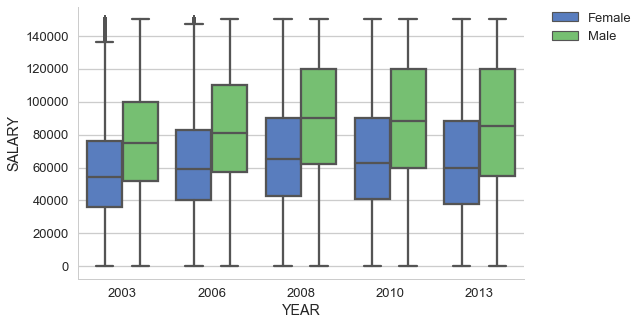

In [28]:
#bar plot of gender and salary 
plt.figure(figsize=[8,5])
sns.boxplot(data=df, y = 'SALARY', x = 'YEAR', hue = 'GENDERS', palette="muted")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Several things we see: ####
1. The median, and the quatiles wages for men is about 30\% higher than women, for all years.
2. There is NO shrinking trend in the gender discrepancies in recent years. 
3. The mean wages increased from year 2003 to 2008. Then we see a small decrease from 2008 to 2013. This makes sense considering the financial crisis in 2008. It is intersting to see the magnitude and how long it has been affecting the job market. 

In the analysis below we take a closer look at the salaries over the years, with different highest degree groups for STEMers. 

## Is the result statistically significant? ##

We first look into the salary gap between men and women in full data.

Define null hypothesis as men and women report the same average salary over the years:
$$s_m = s_f$$
Alternative hypothesis:
$$s_m \neq s_f$$

Now it's time for the two sample t test for the difference of means:


In [29]:
salary_m = df[df['GENDERS']=='Male']['SALARY']
salary_f = df[df['GENDERS']=='Female']['SALARY']
diff_perc_s = (np.mean(salary_m)-np.mean(salary_f))/np.mean(salary_f)
print('The mean salary for men is {0:.2f} % higher than that of women.'.format(round(diff_perc_s*100,2)))
stats.ttest_ind(salary_m.dropna(), salary_f.dropna(),  equal_var = False)

The mean salary for men is 32.38 % higher than that of women.


Ttest_indResult(statistic=172.80152812858356, pvalue=0.0)

It's found that pvalue is practically zero. The null hypothesis is rejected. 

#### There is a significant difference in the average pay between men and women.####

The difference of means, also calculated above, is 32%. We say this is not only statistically significant, but also practically significant!



## If an observation is from a minority group or not makes a difference in salary?##

The answer is YES. According to the survey data, a self-reported caucasion individual makes 15% more money in average than a minority individual. That is a decent difference! 

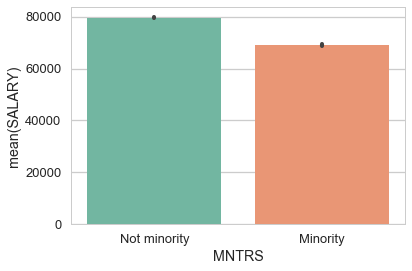

In [30]:
#Compare and visualize the minority factor
sns.barplot(data=df, y = 'SALARY', x = 'MNTRS', palette="Set2" )

### Now checking if this is statistically sound:
Null hypothesis:
$$ s_{notmin} = s_{min} $$
Two sample t test for difference of means:

In [31]:
salary_notmin = df[df['MNTRS']=='Not minority']['SALARY']
salary_min = df[df['MNTRS']=='Minority']['SALARY']
diff_perc_s = (np.mean(salary_notmin)-np.mean(salary_min))/np.mean(salary_min)
print('The mean salary for not minorities is {0:.2f} % higher than that of minorities.'.format(round(diff_perc_s*100,2)))
stats.ttest_ind(salary_notmin.dropna(), salary_min.dropna(),  equal_var = False)

The mean salary for not minorities is 15.29 % higher than that of minorities.


Ttest_indResult(statistic=68.622301946918981, pvalue=0.0)

The results above give the p value for the two sample t test is zero. It is smaller than the significance level and the null hypothesis is rejected. 

#### The pay disparity between these two groups is statistically significant!####


## What is employment rate of the female STEMers in different field of majors?##

The dot plot shows the female employment rate for field of major groups in 2003 and 2013. 
Things worth noticing:
1. The employment rate for non-science and engineering fields major remained above average for both years. A closer look reveals this group contains job title such as 'Management' and 'Administration'. 
2. There is a significant increase in the employment rate for the female engineering group (from 85% to 88%). 
3. The employment rate of another group who saw an increase from 2003 to 2013 is computer/maths sciences. All the other group either remained a similar or received a lower rate.

Found trend from this plot!

In [32]:
employ_female_2003 = df_2003[df_2003['GENDERS']=='Female'].groupby('MajorS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [33]:
employ_female_2013 = df_2013[df_2013['GENDERS']=='Female'].groupby('MajorS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

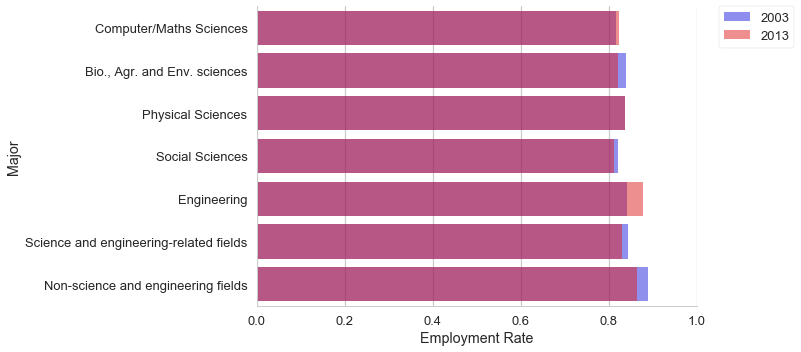

In [34]:
fig, axs = plt.subplots(figsize=(10,5))
field_order = ['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields']
#Compare and plot the employment percentage for male and female college graduates
sns.set_color_codes("pastel")
sns.barplot( x="Employed",y="MajorS", order = field_order, alpha=0.5, data=employ_female_2003, color='blue', label='2003')


#Compare and plot the employment percentage for male and female doctor graduates
sns.set_color_codes("pastel")
sns.barplot(x="Employed", y="MajorS", order = field_order, alpha=0.5, data=employ_female_2013, color='red', label='2013')
axs.set(xlim=(0, 1), ylabel="Major",
       xlabel="Employment Rate")
sns.despine()
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=True)
plt.tight_layout()

We mentioned above the employment rate of engineering major has increased from 2003 to 2013, unlike most of other majors. Now let us investigate this in a statistically scientific way. 

The null hypothesis is defined as: the employment rate for engineering majored females stays the same in 2013 as in 2003. 
$$e_{2003} = e_{2013}$$

Use the two sample t test:

In [35]:
employ_f_engineer_YEAR = df[(df['GENDERS']=='Female') & (df['MajorS']=='Engineering')]['YEAR']
employ_f_engineer_LFSTATS = df[(df['GENDERS']=='Female') & (df['MajorS']=='Engineering')]['LFSTATS']

cont_table = pd.crosstab(index=employ_f_engineer_YEAR, columns=employ_f_engineer_LFSTATS)
chi2, pval, _, _ = stats.chi2_contingency(cont_table)

print("Chi-squared test statistic: {}".format(chi2))
print("p-value: {}".format(pval))

Chi-squared test statistic: 29.712897332902013
p-value: 5.5992808229492995e-06


The p-value is well below the significance level 0.01. The null hypothesis is rejected. 
#### The conclusion here is the increase in female enginnering employment rate from 2003 to 2013 is statistically significant! ####

## Are there differences in job satisfaction between genders? ## 
 

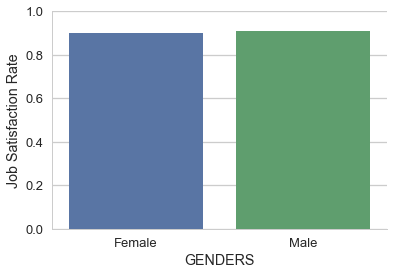

In [36]:
#how many people are satisfied with their jobs
df_graduate_satisfy = df.groupby('GENDERS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='GENDERS', y='Satisfied', data=df_graduate_satisfy)
plt.ylim([0,1])
plt.ylabel('Job Satisfaction Rate')
sns.despine()

#### The above plot shows both men and women have a high (about 90%) job satisfaction rate in STEM. 

#### The difference bewteen the genders is small. 

## Is the there a statistically significant difference?

The null hypothesis here: the job statisfaction rate remains the same for male and female employees in the STEM field. 
$$js_m = js_f$$

In [37]:
df_employed = df[pd.notnull(df['JobSatis'])]
cont_table = pd.crosstab(index=df_employed.GENDERS, columns=df_employed.JobSatis, normalize='index')
print(cont_table)
cont_table2 = pd.crosstab(index=df_employed.GENDERS, columns=df_employed.JobSatis)
chi2, pval, _, _ = stats.chi2_contingency(cont_table2)
print("Chi-squared test statistic: {}".format(chi2))
print("p-value: {}".format(pval))

JobSatis  Dissatisfied  Satisfied
GENDERS                          
Female        0.098798   0.901202
Male          0.089292   0.910708
Chi-squared test statistic: 103.0209000980635
p-value: 3.3163113124478954e-24


We find the p-value so small that the null hypothesis is easily rejected. The story once again points at the alternative hypothesis.
#### The  difference of the job satisfaction between men and women STEMers is statistically significant. 

However, we see both from the bar plot and the calculation, the difference is merely 1%. Does this statistically sound disparity really mean anything in the real world? Should we make any executive decisions or suggestions based on this data analysis? My answer to this is not really. The difference is so small that we can not say either gender is actually happier with their jobs than the other gender group. 

#### The  difference of the job satisfaction between men and women STEMers is not practically significant. 

# Summary

In this report, I did statistical study in many aspects of the exploratory data analysis on the STEM higher education data set. The disparity in employment rate, salary and job satisfaction between males and females all turned out to be statistically significant. Several other statistical tests in  minority gaps, chronological changes and etc. also gave very small p value and rejected the null hypothesis. 

The consistent statistical significance may come from the large sample number of the data set (?). Although one test proven to be statistically significant does not mean it is practically significant. It is always a good idea to discuss the actual meaning of the test results and whether the effect needs to be addressed.   

